In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('DataSetDelivery.scv')

C:\Users\92202\AppData\Local\Temp\ipykernel_20460\3445930315.py:1: DtypeWarning: Columns (14,16,17,18,38,42,44,49,50,51,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DataSetDelivery.scv')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12005116 entries, 2022-01-04 00:36:00 to 2023-05-25 19:30:00
Data columns (total 64 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Unnamed: 0                         int64         
 1   Заказ                              object        
 2   Тип отгрузки                       object        
 3   Материал                           object        
 4   Группа материала                   object        
 5   Единица материала                  object        
 6   Производитель_x                    object        
 7   Товарная категория_x               object        
 8   Код 1С                             float64       
 9   Кол-во                             float64       
 10  Вес                                float64       
 11  Объем                              float64       
 12  Технозона                          object        
 13  Опасный                        

In [8]:
from datetime import datetime

In [9]:
df['date'] = pd.to_datetime(df['Дата заказа'])
df = df.set_index('Дата заказа')

In [11]:
df['Месяц'] = df['date'].dt.month

In [13]:
df['Год'] = df['date'].dt.year

In [16]:
df_pivot = df.pivot_table(index=('Год','Месяц' ), columns=('Товарное направление', 'Класс'), values='Материал', aggfunc= 'nunique', fill_value=0)
df_pivot

Товарное направление          АКБ Автолампы_                      \
Класс                Аккумуляторы   Автосвет Электрооборудование   
Год    Месяц                                                       
2022.0 1.0                     52       1220                   0   
       2.0                    167       1469                   0   
       3.0                    175       1336                   0   
       4.0                    131       1359                   0   
       5.0                    147       1431                   0   
       6.0                    159       1478                   0   
       7.0                    145       1515                   0   
       8.0                    172       1568                   1   
       9.0                    197       1634                   1   
       10.0                   208       1694                   1   
       11.0                   225       1685                   1   
       12.0                   238       1720                   1   
2023.0 1.0                    243       1740                   3   
       2.0                    211       1809                   2   
       3.0                    207       1845                   1   
       4.0                    228       1758                   3   
       5.0                    234       1889                   3   
       6.0                      0          1                   0   

Товарное направление Автохимия и автокосметика                             \
Класс                           Автоаксессуары Автохимия  и автокосметика   
Год    Месяц                                                                
2022.0 1.0                                   2                       1207   
       2.0                                   2                       1582   
       3.0                                   5                       2863   
       4.0                                   8                       2934   
       5.0                                   6                       3020   
       6.0                                   9                       3060   
       7.0                                   9                       3198   
       8.0                                   8                       3338   
       9.0                                   7                       3317   
       10.0                                  7                       3286   
       11.0                                  8                       3270   
       12.0                                  7                       3129   
2023.0 1.0                                   7                       3200   
       2.0                                   8                       3439   
       3.0                                   8                       3654   
       4.0                                   8                       3723   
       5.0                                  12                       3820   
       6.0                                   0                          0   

Товарное направление                                                         \
Класс                Инструмент и оборудование Масла и технические жидкости   
Год    Месяц                                                                  
2022.0 1.0                                   1                            1   
       2.0                                   2                            2   
       3.0                                   3                            6   
       4.0                                   3                            6   
       5.0                                   3                            6   
       6.0                                   3                            6   
       7.0                                   3                            4   
       8.0                                   3                            8   
       9.0                                   3                            8   
     

In [17]:
df_pivot.to_excel('pivot_table.xlsx')

In [19]:
df_pivot2 = df.pivot_table(index=('Год','Месяц','Класс' ), columns=('Технозона'), values='Материал', aggfunc= 'nunique', fill_value=0)
df_pivot2

Технозона                                100 ЗН «Мезонин 1 этаж»  \
Год    Месяц Класс                                                 
2022.0 1.0   Автоаксессуары                                  353   
             Автокрепеж                                       55   
             Автосвет                                         55   
             Автохимия  и автокосметика                       66   
             Агрегаты                                          1   
...                                                          ...   
2023.0 5.0   Фильтры                                         788   
             Шины и диски                                     27   
             Электрооборудование                             724   
       6.0   Автоаксессуары                                    1   
             Автосвет                                          0   

Технозона                                100 ЗН «Мезонин 2 этаж»  \
Год    Месяц Класс                                                 
2022.0 1.0   Автоаксессуары                                  332   
             Автокрепеж                                      776   
             Автосвет                                         69   
             Автохимия  и автокосметика                       16   
             Агрегаты                                          0   
...                                                          ...   
2023.0 5.0   Фильтры                                        1344   
             Шины и диски                                     85   
             Электрооборудование                            1695   
       6.0   Автоаксессуары                                    0   
             Автосвет                                          0   

Технозона                                100 ЗН «Мезонин 3 этаж»  \
Год    Месяц Класс                                                 
2022.0 1.0   Автоаксессуары                                  778   
             Автокрепеж                                       91   
             Автосвет                                         63   
             Автохимия  и автокосметика                       33   
             Агрегаты                                          0   
...                                                          ...   
2023.0 5.0   Фильтры                                         762   
             Шины и диски                                     39   
             Электрооборудование                            1704   
       6.0   Автоаксессуары                                    0   
             Автосвет                                          0   

Технозона                                100 ЗН «Мезонин 4 этаж»  \
Год    Месяц Класс                                                 
2022.0 1.0   Автоаксессуары                                 1076   
             Автокрепеж                                      857   
             Автосвет                                        937   
             Автохимия  и автокосметика                      868   
             Агрегаты                                          0   
...                                                          ...   
2023.0 5.0   Фильтры                                        4789   
             Шины и диски                                     60   
             Электрооборудование                            1417   
       6.0   Автоаксессуары                                    1   
             Автосвет                                          1   

Технозона                                100 ЗН «Стеллажи»  \
Год    Месяц Класс                                           
2022.0 1.0   Автоаксессуары                             20   
             Автокрепеж                                  0   
             Автосвет                                    0   
             Автохимия  и автокосметика                 27   
             Агрегаты                                    0   
...                       

In [22]:
df_pivot2.to_excel('pivot_table.xlsx')

Расчет АВС

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df['total_revenue'] = df['Кол-во'] * df['Цена']

In [46]:
df = df.sort_values('total_revenue', ascending=False)

In [47]:
df['cumulative_revenue'] = df['total_revenue'].cumsum()
df['revenue_share'] = df['cumulative_revenue'] / df['total_revenue'].sum()

In [48]:
def classify_product(revenue_share):
    if revenue_share <= 0.7:
        return 'A'
    elif revenue_share <= 0.9:
        return 'B'
    else:
        return 'C'

df['product_class'] = df['revenue_share'].apply(classify_product)

<Axes: ylabel='total_revenue'>

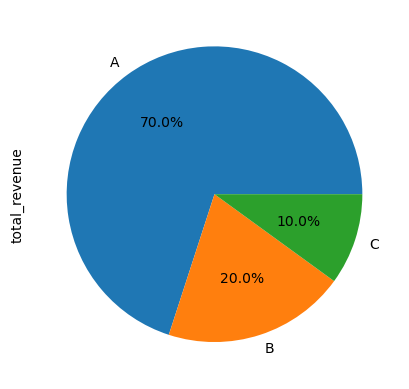

In [49]:
class_revenue = df.groupby('product_class')['total_revenue'].sum()
class_revenue.plot(kind='pie', autopct='%1.1f%%')

In [52]:
df_pivot3 = df.pivot_table(index=('product_class', 'Класс'), columns='Товарное направление', values='Материал', aggfunc= 'nunique', fill_value=0)
df_pivot3

Товарное направление                        АКБ  Автолампы_  \
product_class Класс                                           
A             Автоаксессуары                  0           0   
              Автокрепеж                      0           0   
              Автосвет                        0        1463   
              Автохимия  и автокосметика      0           0   
              Агрегаты                        0           0   
              Аккумуляторы                  347           0   
              Двигатель                       0           0   
              Инструмент и оборудование       0           0   
              Кузов                           0           0   
              Масла и технические жидкости    0           0   
              Подвеска                        0           0   
              Рулевое управление              0           0   
              Торомозная система              0           0   
              Трансмиссия                     0           0   
              Фильтры                         0           0   
              Шины и диски                    0           0   
              Электрооборудование             0           0   
B             Автоаксессуары                  0           0   
              Автокрепеж                      0           0   
              Автосвет                        0        2006   
              Автохимия  и автокосметика      0           0   
              Аккумуляторы                    9           0   
              Двигатель                       0           0   
              Инструмент и оборудование       0           0   
              Кузов                           0           0   
              Масла и технические жидкости    0           0   
              Подвеска                        0           0   
              Рулевое управление              0           0   
              Торомозная система              0           0   
              Трансмиссия                     0           0   
              Фильтры                         0           0   
              Шины и диски                    0           0   
              Электрооборудование             0           0   
C             Автоаксессуары                  0           0   
              Автокрепеж                      0           0   
              Автосвет                        0        1949   
              Автохимия  и автокосметика      0           0   
              Двигатель                       0           0   
              Инструмент и оборудование       0           0   
              Кузов                           0           0   
              Масла и технические жидкости    0           0   
              Подвеска                        0           0   
              Рулевое управление              0           0   
              Торомозная система              0           0   
              Трансмиссия                     0           0   
              Фильтры                         0           0   
              Шины и диски                    0           0   
              Электрооборудование             0           3   

Товарное направление                        Автохимия и автокосметика  \
product_class Класс                                                     
A             Автоаксессуары                                        8   
              Автокрепеж                                            0   
              Автосвет                                              0   
              Автохимия  и автокосметика                         2907   
              Агрегаты                                              0   
              Аккумуляторы                                          0   
              Двигатель                                             0   
              Инструмент и оборудование                             3   
              Кузов                                                 0   
              Масла и технические жидкости    

In [53]:
df_pivot3.to_excel('pivot_table.xlsx')

In [54]:
df.head()

,Unnamed: 0,Заказ,Тип отгрузки,Материал,Группа материала,Единица материала,Производитель_x,Товарная категория_x,Код 1С,Кол-во,...,Категорийный менеджер,Суммарный вес,Суммарный объем,date,Месяц,Год,total_revenue,cumulative_revenue,revenue_share,product_class
Дата заказа,,,,,,,,,,,,,,,,,,,,,
2023-05-18 09:32:00,1847913,ЗШО [ино]2023-05-18 09:26:04,NaN,K015631XS_Ремкомплект ГРМ 2170 Gates,300 Мезонин 1 этаж,шт,GATES,Ремкомплекты ГРМ,52504.0,124.0,...,Семеновых Юлия Владимировна,87.172,0.343728,2023-05-18 09:32:00,5.0,2023.0,908560.4,908560.4,0.000060,A
2023-05-01 16:20:00,1847911,ЗШО [ино]2023-05-01 16:10:03,NaN,K015631XS_Ремкомплект ГРМ 2170 Gates,300 Мезонин 1 этаж,шт,GATES,Ремкомплекты ГРМ,52504.0,120.0,...,Семеновых Юлия Владимировна,84.360,0.332640,2023-05-01 16:20:00,5.0,2023.0,879252.0,1787812.4,0.000118,A
2023-04-29 09:12:00,1847667,ЗШО [ино]2023-04-29 08:56:02,NaN,K015631XS_Ремкомплект ГРМ 2170 Gates,300 Мезонин 1 этаж,шт,GATES,Ремкомплекты ГРМ,52504.0,120.0,...,Семеновых Юлия Владимировна,84.360,0.332640,2023-04-29 09:12:00,4.0,2023.0,879252.0,2667064.4,0.000176,A
2023-04-27 17:29:00,1847338,ЗШО [ино]2023-04-27 17:18:03,NaN,K015631XS_Ремкомплект ГРМ 2170 Gates,300 Мезонин 1 этаж,шт,GATES,Ремкомплекты ГРМ,52504.0,118.0,...,Семеновых Юлия Владимировна,82.954,0.327096,2023-04-27 17:29:00,4.0,2023.0,864597.8,3531662.2,0.000233,A
2023-05-03 12:28:00,1847910,ЗШО [ино]2023-05-03 12:18:06,NaN,K015631XS_Ремкомплект ГРМ 2170 Gates,300 Мезонин 1 этаж,шт,GATES,Ремкомплекты ГРМ,52504.0,109.0,...,Семеновых Юлия Владимировна,76.627,0.302148,2023-05-03 12:28:00,5.0,2023.0,798653.9,4330316.1,0.000286,A
